In [1]:
PROJECT_PATH = "/Users/lukefoster/Documents/CompEtho/BM_GPU"
CONFIG_PATH = f"{PROJECT_PATH}/config_ant.yaml"

In [2]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile
import os
import math
import seaborn as sns

sys.path.append(PROJECT_PATH)
from utils.data import Dataset
import utils.figure as ufigure

In [3]:
Data = Dataset(PROJECT_PATH, CONFIG_PATH)
Data.load_data()

  0%|          | 0/141 [00:00<?, ?it/s]

Loading config.yaml ...
Finished loading config
Loading INFO.yaml ...
Finished loading INFO


100%|██████████| 141/141 [00:09<00:00, 14.79it/s]


In [4]:
INFO = Data.info
INFO_values = Data.info_values
config = Data.config

In [5]:
skeleton = config['skeleton']
skeleton_color = config['skeleton_color']

bp = Data.data_obj['bodypoints']
rot_bp = Data.data_obj['rotated_bodypoints']
scaled_bp = Data.data_obj['scaled_bodypoints']

In [6]:
MIN_PATH = f"{PROJECT_PATH}/results/final/01Pdminfd_antmovie200927193143"
MID_PATH = f"{PROJECT_PATH}/results/final/01SSmidfr_antmovie201010190036"
MAJ_PATH = f"{PROJECT_PATH}/results/final/05YYmajfd_antmovie200924211818"

min_bp = np.load(f"{MIN_PATH}/bodypoints.npy")
min_scaled_bp = np.load(f"{MIN_PATH}/scaled_bodypoints.npy")
min_rot_bp = np.load(f"{MIN_PATH}/rotated_bodypoints.npy")

mid_bp = np.load(f"{MID_PATH}/bodypoints.npy")
mid_scaled_bp = np.load(f"{MID_PATH}/scaled_bodypoints.npy")
mid_rot_bp = np.load(f"{MID_PATH}/rotated_bodypoints.npy")

maj_bp = np.load(f"{MAJ_PATH}/bodypoints.npy")
maj_scaled_bp = np.load(f"{MAJ_PATH}/scaled_bodypoints.npy")
maj_rot_bp = np.load(f"{MAJ_PATH}/rotated_bodypoints.npy")

In [160]:
fr=600
x_min, x_max = 0, 120
y_min, y_max = 30, 140

In [213]:
def ant_comparison(ant_data, ant_size):
    fig,ax = plt.subplots(1, 3, figsize=(12,4))

    for i,data in enumerate(ant_data):
        ax[i].scatter(data[fr,:,0], data[fr,:,1], s=7, c='k')
        
        if i == 0:
            ax[i].xaxis.set_ticks(np.arange(0,200,20))
            ax[i].yaxis.set_ticks(np.arange(0,200,20))
            ax[i].set(xlim=(x_min,x_max),ylim=(y_min,y_max))
            
        elif i == 1 or i == 2:
            ax[i].xaxis.set_ticks(np.arange(-5,5,0.5))
            ax[i].yaxis.set_ticks(np.arange(-5,5,0.5))
        
        for skeleton_i, color_i in zip(skeleton, skeleton_color):
                ax[i].plot(data[fr,skeleton_i,0], data[fr,skeleton_i,1], alpha=0.7, c=color_i, linewidth=2)
    
    if ant_size == "min":
        fig.text(-0.15,0.5,"Minor Ant",fontsize=16)
        fig.text(0.08,1.05,"Unaltered Bodypoints",fontsize=16)
        fig.text(0.355,1.05,"Scaling and Egocentric Alignment",fontsize=16)
        fig.text(0.728,1.05,"Rotational Transformation",fontsize=16)
    elif ant_size == "mid":
        fig.text(-0.15,0.5,"Median Ant",fontsize=16)
    elif ant_size == "maj":
        fig.text(-0.15,0.5,"Major Ant",fontsize=16)
    
    plt.tight_layout()
    plt.show()
    fig.savefig(f"{ant_size}_preprocessing.png", bbox_inches='tight')

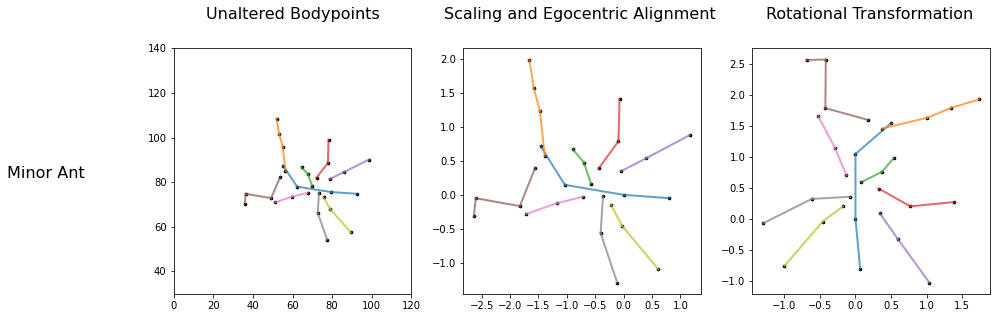

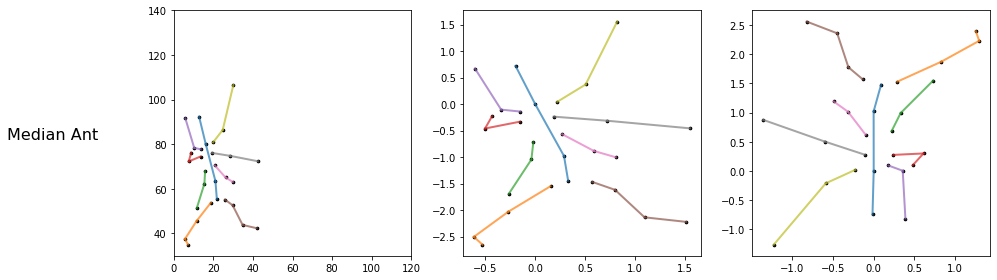

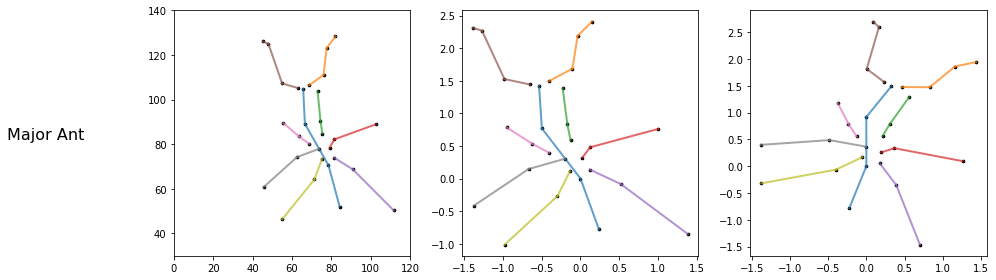

In [214]:
min_ant_data = [min_bp, min_scaled_bp, min_rot_bp]
mid_ant_data = [mid_bp, mid_scaled_bp, mid_rot_bp]
maj_ant_data = [maj_bp, maj_scaled_bp, maj_rot_bp]

fig = ant_comparison(min_ant_data, "min"), ant_comparison(mid_ant_data, "mid"), ant_comparison(maj_ant_data, "maj")

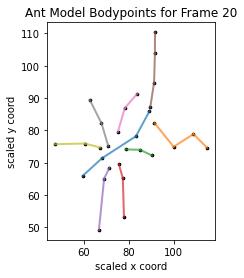

In [35]:
ufigure.ant_model(min_bp, skeleton, skeleton_color, fr=20)

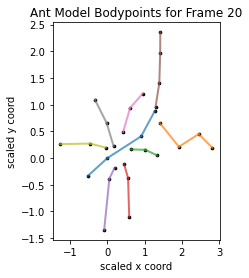

In [28]:
ufigure.ant_model(min_scaled_bp, skeleton, skeleton_color, fr=20)

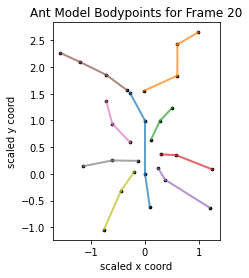

In [29]:
ufigure.ant_model(min_rot_bp, skeleton, skeleton_color, fr=20)

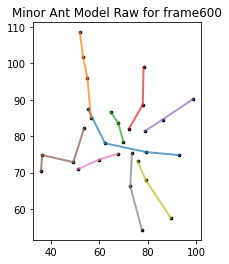

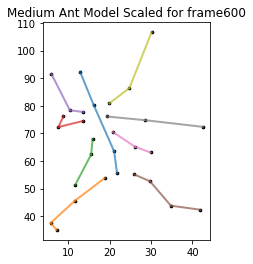

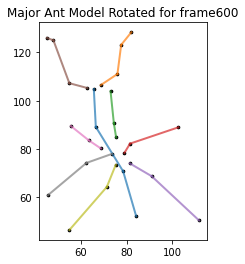

In [30]:
#ufigure.comp_ant_models(min_bp, mid_bp, maj_bp, skeleton, skeleton_color, fr=600)
ufigure.comp_ant_models(min_bp, mid_bp, maj_bp, skeleton, skeleton_color, fr=600)

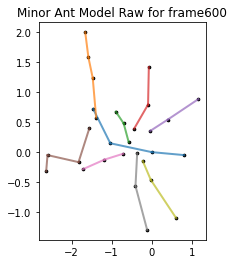

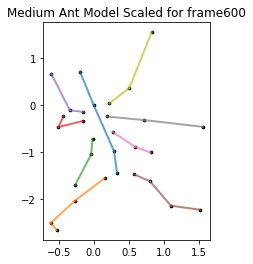

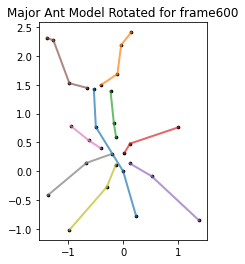

In [31]:
ufigure.comp_ant_models(min_scaled_bp, mid_scaled_bp, maj_scaled_bp, skeleton, skeleton_color, fr=600)

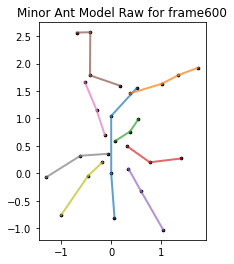

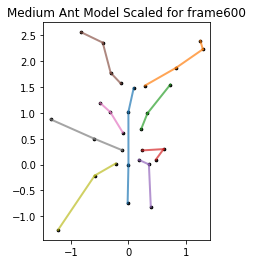

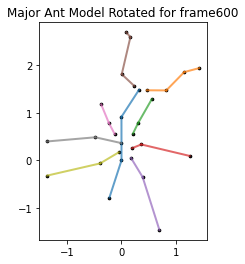

In [32]:
ufigure.comp_ant_models(min_rot_bp, mid_rot_bp, maj_rot_bp, skeleton, skeleton_color, fr=600)

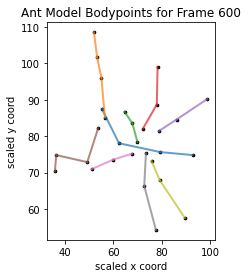

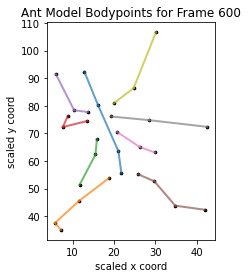

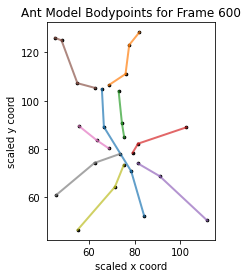

In [33]:
for bp in [min_bp,mid_bp,maj_bp]:
    ufigure.ant_model(bp, skeleton, skeleton_color, fr=600)